In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=5000, centers=2, 
                  cluster_std=[6, 4], n_features=2, 
                  random_state=40)

In [2]:
import pandas as pd
all_dataset = pd.DataFrame(dict(label=y, a=X[:,0], b=X[:,1]))
print(all_dataset)

      label          a          b
0         1  11.253262  -5.355250
1         0   5.155165  -1.044914
2         0   4.023015  -6.368246
3         0  -6.094907  -7.146572
4         1   0.839381 -10.651923
...     ...        ...        ...
4995      0   0.194730  -8.277397
4996      0   4.966191  -7.437370
4997      0  -5.376702  -7.324231
4998      1   6.371769  -1.671036
4999      0   2.474043 -13.858433

[5000 rows x 3 columns]


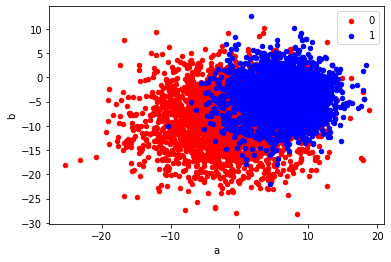

In [4]:
from matplotlib import pyplot

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = all_dataset.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='a', y='b', 
               label=key, color=colors[key])
    
pyplot.show()

In [5]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(all_dataset, 
                                   test_size=0.2, 
                                   random_state=0)

training, validation = train_test_split(train_val, 
                                        test_size=0.25, 
                                        random_state=0)

In [6]:
training

,label,a,b
2869,1,5.495257,-7.298110
4588,1,11.538980,1.776162
4423,0,-7.362446,-0.777593
963,1,8.311903,-6.773622
3018,0,0.617189,-5.809337
...,...,...,...
3,0,-6.094907,-7.146572
3661,0,0.587368,-10.858990
3911,1,-2.410089,-8.436436
3588,0,-4.745941,-1.500113


In [7]:
validation

,label,a,b
1827,0,-1.272569,0.388111
3688,1,7.930955,-2.510119
3591,0,-2.982887,-6.956733
1840,0,-10.263374,-10.968153
1979,1,5.839357,-3.068643
...,...,...,...
2492,0,-1.694507,-3.569015
4835,1,5.447907,-5.371618
3793,1,1.906472,-7.107010
2709,0,9.129038,-9.253943


In [8]:
test

,label,a,b
398,1,2.698427,-0.811067
3833,0,-7.546137,-7.444046
4836,0,-6.850566,-15.322851
4572,1,8.338603,-5.083704
636,0,1.083114,-8.722642
...,...,...,...
4228,0,12.950594,-15.304722
2367,0,-1.767492,-1.240460
788,0,3.271917,-7.494765
1452,1,5.960743,-8.790329


In [9]:
!mkdir -p tmp

In [10]:
training.to_csv('tmp/training_data.csv', header=False, index=False)
validation.to_csv('tmp/validation_data.csv', header=False, index=False)
test.to_csv('tmp/test_data.csv', header=False, index=False)

In [11]:
s3_bucket = "sagemaker-cookbook-bucket"
prefix = "chapter05"

In [12]:
!aws s3 cp tmp/training_data.csv s3://{s3_bucket}/{prefix}/input/training_data.csv
!aws s3 cp tmp/validation_data.csv s3://{s3_bucket}/{prefix}/input/validation_data.csv
!aws s3 cp tmp/test_data.csv s3://{s3_bucket}/{prefix}/input/test_data.csv

upload: tmp/training_data.csv to s3://sagemaker-cookbook-bucket/chapter05/input/training_data.csv
upload: tmp/validation_data.csv to s3://sagemaker-cookbook-bucket/chapter05/input/validation_data.csv
upload: tmp/test_data.csv to s3://sagemaker-cookbook-bucket/chapter05/input/test_data.csv
